In [1]:
import utils as ut
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [13]:
ls MD1/SA-MD1-STEP1/

info.txt           param_props.csv    results.txt        sample_matrix.csv


In [2]:
#Load paths
samples='sample_matrix.csv'
results='results.txt'
results_new='results.csv'
path_EML='EML21/'
path_MD3='MD3/'
path_MD1='MD1/'
path_TK='TK/'
path_USPrr='US-Prr/SA/'

In [3]:
#Load Functions
def read_samples_resutls(paths,pathr):
    df_param = pd.read_csv(paths)
    df_model = pd.read_csv(pathr,header=None)
    return [df_param,df_model]

def plot_analysis(df_param,df_model):
    xparams, ymodel =  ut.get_best_match(df_param,df_model)
    y=ymodel.sort_values(by=[rmetric],ascending=order)[:nelem]
    x=xparams.sort_values(by=[rmetric],ascending=order)[:nelem]

    y.iloc[:,:-6].transpose().plot(logy=False,legend=False,alpha=0.5,figsize=(10,5))
    nrange=range(len(df_model.columns))
    ax = df_model.iloc[-1,:].plot(logy=False,legend=True,style="o",color='red',
                                      xticks=nrange, rot=90, label="Targets");
    ax.set_xticklabels(y.columns,fontsize=12)
    print('Targets')
    print(list(df_model.iloc[-1,:]))
    
    return x

## EML 

Targets
[21.831, 132.247, 301.4, 1.792, 15.469, 49.072, 26.139]


,cmax,cmax.1,cmax.2,cmax.3,cmax.4,cmax.5,cmax.6
mean,31.963144,194.681591,392.525042,3.554135,20.507774,73.125904,44.393025
std,8.061766,12.724819,12.922921,1.062409,4.971082,10.916786,13.575235
min,22.254092,171.719257,369.259280,2.112722,15.300503,54.470432,21.816181
max,44.839221,214.717207,407.831574,4.786065,30.445952,88.023406,61.613311


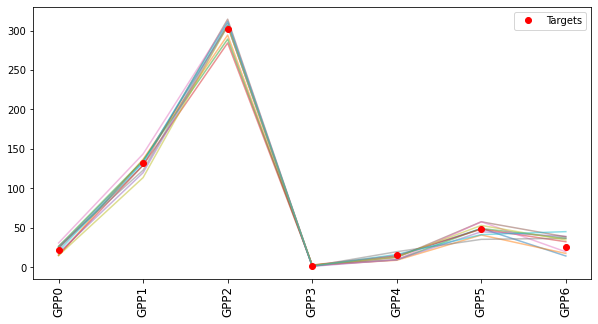

In [4]:
rmetric='RMSE'
nelem=10
order=True

sa_folder='sa_cmax_EML21_090_AK/'
[df_param_EML,df_model_EML0]=read_samples_resutls(path_EML+sa_folder+samples,
                                                 path_EML+sa_folder+results)
output_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','NA','NA']
df_model_EML0.columns = output_name
df_model_EML=df_model_EML0.iloc[:,:-2].copy()
    
yy=plot_analysis(df_param_EML,df_model_EML)
yy[['cmax','cmax.1','cmax.2','cmax.3','cmax.4','cmax.5','cmax.6']].describe().loc[['mean','std','min','max']]

Targets
[7.277, 44.082, 100.47, 0.598, 5.156, 16.357, 8.713]


,nmax,nmax.1,nmax.2,nmax.3,nmax.4,nmax.5,nmax.6
mean,7.836333,25.977594,12.225143,0.547141,3.028581,11.090631,4.699727
std,3.753892,18.730018,7.598184,0.318957,1.506422,4.859498,2.951776
min,1.524057,6.386246,3.359704,0.058794,0.883441,1.165547,1.290798
max,12.675586,51.991097,23.920733,0.935210,5.041381,18.455025,9.138119


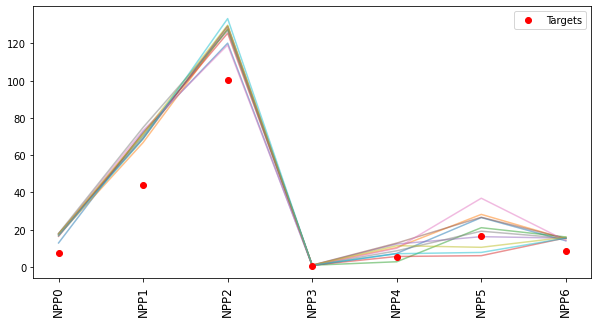

In [5]:
sa_folder='sa_nmaxkrb_EML21_090_AK-2/'
[df_param_EML,df_model_EML]=read_samples_resutls(path_EML+sa_folder+samples,
                                                 path_EML+sa_folder+results)
output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
               'VEGC00','VEGC10','VEGC20',
               'VEGC01','VEGC11','VEGC21', 
               'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06']
df_model_EML.columns = output_name
yy=plot_analysis(df_param_EML,df_model_EML[['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6']])
yy[['nmax','nmax.1','nmax.2','nmax.3','nmax.4','nmax.5','nmax.6']].describe().loc[['mean','std','min','max']]

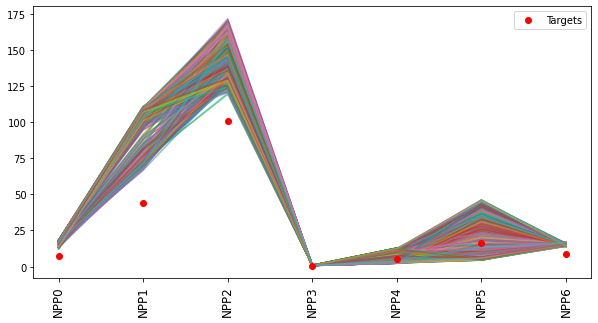

In [6]:
ut.spaghetti_match_plot(df_param_EML,df_model_EML[['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6']])

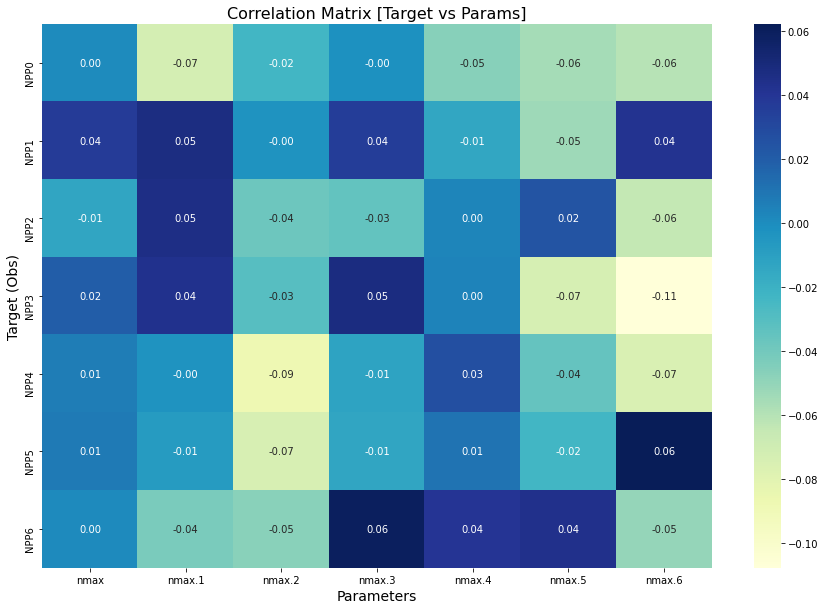

In [7]:
corr_mp=ut.get_output_param_corr(df_param_EML[['nmax','nmax.1','nmax.2','nmax.3','nmax.4','nmax.5','nmax.6']],
                                 df_model_EML[['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6']],
                                 (12,10))

In [9]:
df_param=df_param_EML[['nmax','nmax.1','nmax.2','nmax.3','nmax.4','nmax.5','nmax.6']].copy()
df_model=df_model_EML[['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6']].copy()

In [14]:
df_param.shape

(500, 7)

In [18]:
df_model.shape

(501, 7)

In [20]:
df_param['nmax.1']

0      50.716001
1       9.830491
2      27.756916
3      16.475991
4      34.214226
         ...    
495    21.599558
496    46.643259
497     5.516474
498    31.562759
499    33.207609
Name: nmax.1, Length: 500, dtype: float64

In [22]:
df_model['NPP0'][:-1]

0      16.567849
1      16.866511
2      17.346697
3      17.850703
4      17.385780
         ...    
495    12.897599
496    17.455563
497    17.136985
498    13.731239
499    17.141020
Name: NPP0, Length: 500, dtype: float64

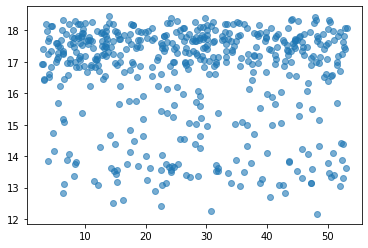

In [23]:
plt.scatter(df_param['nmax.1'], df_model['NPP0'][:-1],alpha=0.6)

In [ ]:
fig, axs = plt.subplots(nrows=m, ncols=n, figsize=(10,10))
for i in range(m):
    for pname in df_param.columns:
        axs[i,j].scatter(df_param['nmax.1'], df_model['NPP0'][:-1],alpha=0.6)

[7, 500]


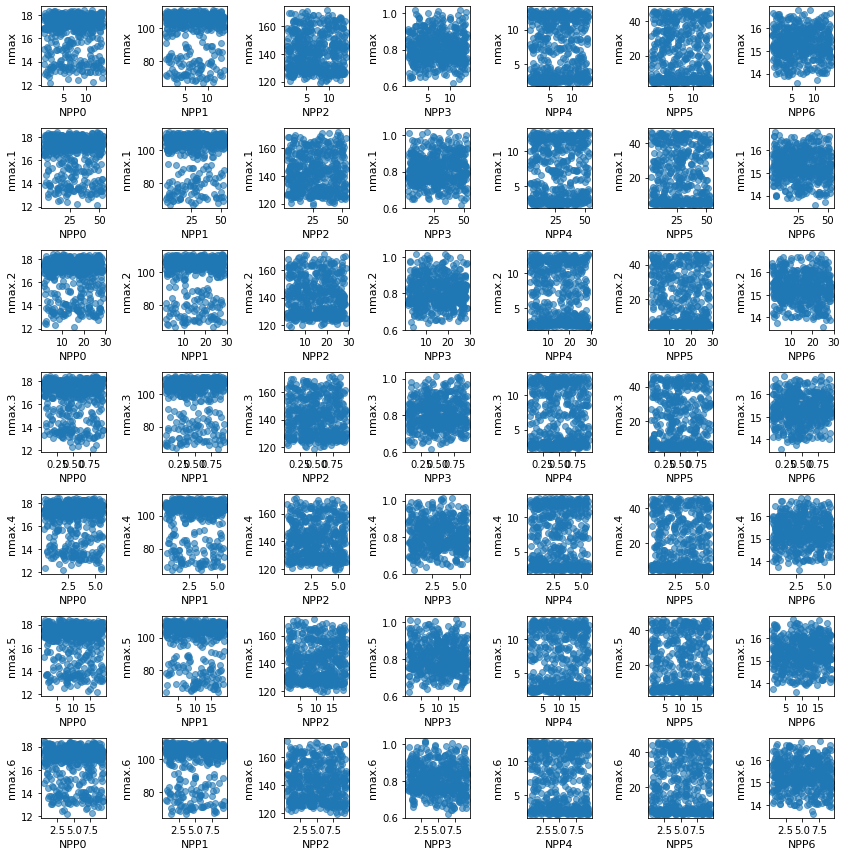

In [11]:
df_param=df_param_EML[['nmax','nmax.1','nmax.2','nmax.3','nmax.4','nmax.5','nmax.6']].copy()
df_model=df_model_EML[['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6']].copy()

[n,m]=df_param.shape
print([m,n])
fig, axs = plt.subplots(nrows=m, ncols=m, figsize=(12,12))

for i in range(m):
    for j in range(m):
        axs[i,j].scatter(df_param.iloc[:,i], df_model.iloc[:-1,j],alpha=0.6)
        axs[i,j].set_xlabel(df_model.columns[j],FontSize=11)
        axs[i,j].set_ylabel(df_param.columns[i],FontSize=11)
fig.tight_layout() 

In [ ]:
plt.scatter(df_param.iloc[0:n,i], df_model.iloc[0:n,j],alpha=0.6)

In [8]:
df_param

NameError: name 'df_param' is not defined

In [ ]:
[n,m]=df_param.shape
fig, axs = plt.subplots(nrows=m, ncols=4, figsize=(10,10))
for i in range(m):
    for j in range(4):
        axs[i,j].scatter(df_param.iloc[0:n,i], df_model.iloc[0:n,j],alpha=0.6)
        axs[i,j].set_xlabel(df_model.columns[j],FontSize=13)
        axs[i,j].set_ylabel(df_param.columns[i],FontSize=13)
fig.tight_layout() 

In [149]:
yy[['nmax','nmax.1','nmax.2','nmax.3','nmax.4','nmax.5','nmax.6']].describe().loc[['mean','std','min','max']]

,nmax,nmax.1,nmax.2,nmax.3,nmax.4,nmax.5,nmax.6
mean,8.016905,30.340043,15.993403,0.401550,3.153027,12.414550,2.674693
std,3.473967,16.813898,6.775766,0.228548,1.837880,4.090793,1.924227
min,2.174644,5.411906,6.374451,0.092268,0.642225,6.243287,0.550682
max,12.675586,50.322801,25.939437,0.773888,5.617217,18.819284,5.998519


In [12]:
31.96/8

3.995

Targets
[7.277, 44.082, 100.47, 0.598, 5.156, 16.357, 8.713, 2.464, 71.674, 105.495, 33.925, 230.388, 169.93, 118.2, 205.57, 0.165, 2.599, 24.75, 133.78, 7.088, 0.044, 0.892, 1.271, 0.66, 1.861, 1.609, 2.189, 3.18, 0.006, 0.092, 0.19, 2.065, 0.139]


,nmax,nmax.1,nmax.2,nmax.3,nmax.4,nmax.5,nmax.6,krb(0),krb(0).1,krb(0).2,...,nfall(2),nfall(2).1,nfall(2).2,nfall(2).3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
mean,7.954651,33.951158,16.844923,0.529888,3.023328,12.031061,4.509859,-7.169883,-6.111603,-1.546653,...,0.000043,0.000082,0.007731,0.000845,0.640547,1411.162791,3.783888e+15,0.608648,0.359453,0.383584
std,2.752275,15.476865,5.514066,0.315337,1.975277,5.304398,2.910526,3.408668,4.665032,1.013338,...,0.000030,0.000043,0.002845,0.000350,0.112793,281.605897,9.065897e+15,0.152230,0.112793,0.143224
min,3.896456,9.575327,6.973501,0.079620,0.492187,1.953512,0.664936,-12.383537,-14.144133,-2.767722,...,0.000011,0.000018,0.003910,0.000324,0.509325,637.301153,3.208513e-01,0.273421,0.140751,0.140751
max,13.239517,52.269686,23.792871,0.942835,5.427502,18.897945,8.774528,-1.378265,-1.908445,-0.255186,...,0.000092,0.000148,0.012869,0.001505,0.859249,1569.484807,2.805733e+16,0.859249,0.490675,0.680552


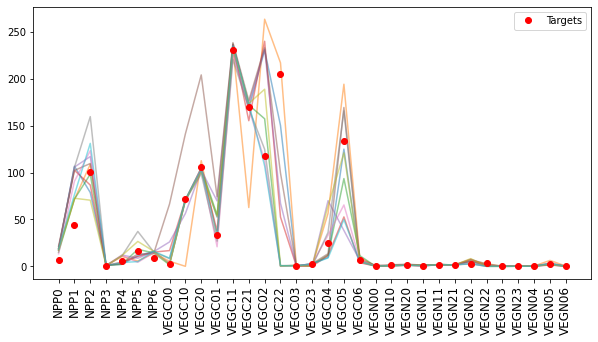

In [86]:
sa_folder = 'sa_nmaxkrbcfallnfall_EML21_090_AK-2/'
df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
               'VEGC00','VEGC10','VEGC20',
               'VEGC01','VEGC11','VEGC21', 
               'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06',
               'VEGN00','VEGN10','VEGN20',
               'VEGN01','VEGN11','VEGN21', 
               'VEGN02','VEGN22','VEGN03','VEGN23','VEGN04','VEGN05','VEGN06']
df_model_EML.columns = output_name

yy=plot_analysis(df_param_EML,df_model_EML)
yy.describe().loc[['mean','std','min','max']]

In [31]:
df_model_EML.iloc[:,:-6]
df_model_EML

,GPP0,GPP1,GPP2,GPP3,GPP4,GPP5,GPP6
0,19.485982,166.144041,415.466397,2.070613,9.024215,31.032662,15.530906
1,30.491512,123.171175,404.550149,0.972030,22.332867,64.076343,20.184257
2,14.988081,75.596318,262.813685,1.952724,13.992082,38.067797,33.692524
3,14.218382,89.572981,288.041946,1.851124,20.065953,34.150348,30.828070
4,24.287746,59.978160,372.048253,1.277703,7.490948,71.434945,46.122020
...,...,...,...,...,...,...,...
996,12.164155,102.380829,348.369146,1.781377,19.224022,65.101568,39.108151
997,11.687496,76.878225,346.520811,2.743405,20.595833,65.795292,23.444398
998,20.457508,110.199460,211.831455,1.017671,22.492069,35.886153,21.601436
999,12.627853,163.535437,359.275952,2.209163,21.606924,40.487633,33.639069


In [23]:
df_model_EML0.iloc[:,:-2]

,GPP0,GPP1,GPP2,GPP3,GPP4,GPP5,GPP6
0,19.485982,166.144041,415.466397,2.070613,9.024215,31.032662,15.530906
1,30.491512,123.171175,404.550149,0.972030,22.332867,64.076343,20.184257
2,14.988081,75.596318,262.813685,1.952724,13.992082,38.067797,33.692524
3,14.218382,89.572981,288.041946,1.851124,20.065953,34.150348,30.828070
4,24.287746,59.978160,372.048253,1.277703,7.490948,71.434945,46.122020
...,...,...,...,...,...,...,...
996,12.164155,102.380829,348.369146,1.781377,19.224022,65.101568,39.108151
997,11.687496,76.878225,346.520811,2.743405,20.595833,65.795292,23.444398
998,20.457508,110.199460,211.831455,1.017671,22.492069,35.886153,21.601436
999,12.627853,163.535437,359.275952,2.209163,21.606924,40.487633,33.639069


Targets
[4365.66, 12814.11, 43416.95, 1.7]


,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
mean,0.582776,0.112700,0.476187,-0.004218,-0.000003,0.999972,8097.059209,0.154040,0.987252,0.000028,0.036709
std,0.993422,0.231591,0.148958,0.003909,0.000023,0.000020,5766.854534,0.037215,0.004478,0.000020,0.008869
min,-0.693619,-0.182881,0.260765,-0.007796,-0.000033,0.999930,1679.758628,0.096409,0.981504,0.000006,0.022976
max,1.870179,0.500635,0.667019,0.003526,0.000046,0.999994,20402.277308,0.201704,0.994183,0.000070,0.048068


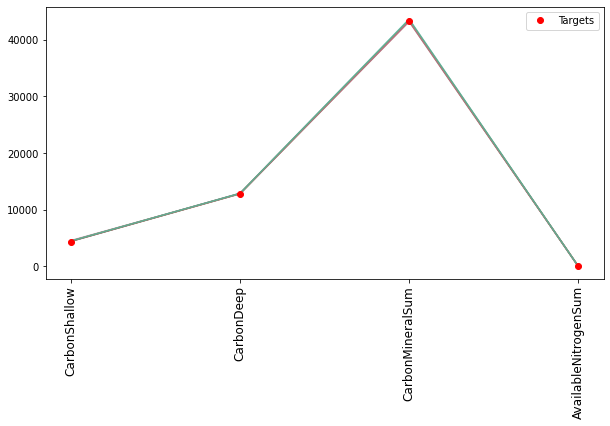

In [87]:
sa_folder = 'sa_soil_EML21_090_AK-2/'
df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
df_model_EML.columns = output_name

yy=plot_analysis(df_param_EML,df_model_EML)
yy.describe().loc[['mean','std','min','max']]

In [91]:
x,y = ut.get_best_match(df_param_EML,df_model_EML)
x=x.sort_values(by=[rmetric],ascending=order)[:nelem]
x

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
207,1.410273,0.077292,0.489959,-0.005909,1.305807e-05,0.999994,1679.758628,0.120989,0.991259,0.000006,0.028833
233,1.794776,0.500635,0.265707,-0.007796,7.407627e-06,0.999989,3218.596134,0.186740,0.983327,0.000011,0.044502
29,-0.673437,0.309225,0.260765,-0.006353,5.729293e-06,0.999988,3359.412120,0.201112,0.981594,0.000012,0.047927
125,0.375767,0.182780,0.513390,-0.006826,4.873889e-07,0.999987,3830.798718,0.177660,0.984420,0.000013,0.042338
179,-0.142250,0.037107,0.667019,-0.007584,-3.289829e-05,0.999980,5702.678472,0.125847,0.990659,0.000020,0.029991
175,-0.296558,0.400736,0.422010,-0.007133,-5.605568e-06,0.999969,8784.251441,0.201704,0.981504,0.000031,0.048068
139,1.139559,0.033222,0.341838,-0.003060,4.622802e-05,0.999965,9864.993193,0.166344,0.985763,0.000035,0.039642
223,1.043072,-0.136321,0.647540,0.000499,-2.409702e-05,0.999961,11209.237724,0.131996,0.989899,0.000039,0.031456
145,1.870179,-0.094796,0.562716,-0.001548,-1.726881e-05,0.999955,12918.588353,0.096409,0.994183,0.000045,0.022976
58,-0.693619,-0.182881,0.590924,0.003526,-2.458790e-05,0.999930,20402.277308,0.131593,0.989916,0.000070,0.031360


Targets
[3079.0, 7703.0, 43404.0, 8.958]


,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
mean,0.550972,0.116710,0.027700,0.001109,1.134070e-15,0.372189,7.026204e+07,0.478103,0.246383,0.628139,0.887150
std,0.383562,0.054878,0.013288,0.002129,4.732129e-16,0.103690,5.683270e+06,0.021559,0.088413,0.103683,0.060174
min,0.082923,0.023070,0.011078,0.000078,2.319830e-16,0.246996,6.070529e+07,0.436726,0.151088,0.453960,0.782107
max,1.110462,0.174133,0.051563,0.006083,1.664177e-15,0.546376,7.658132e+07,0.508428,0.406016,0.753319,0.956730


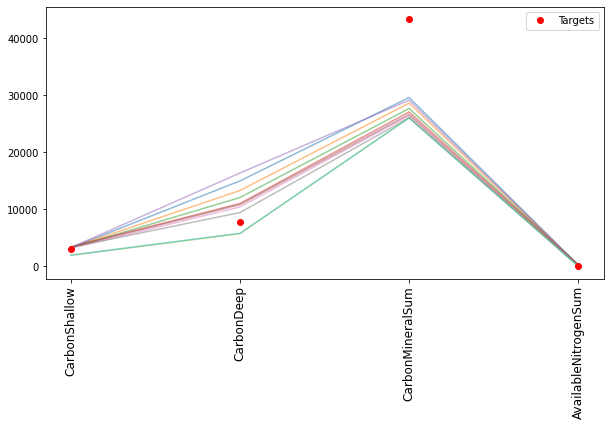

In [92]:
#Load TK3
sa_folder = 'soilC-tk-EJ-095_case2/'
df_param_TK = pd.read_csv(path_TK+sa_folder+samples)
df_model_TK = pd.read_csv(path_TK+sa_folder+'results.csv',header=None)

df_model_TK.columns = output_name

yy=plot_analysis(df_param_TK,df_model_TK)
yy.describe().loc[['mean','std','min','max']]

## MD3

Targets
[1.81, 61.75, 997.38, 0.82]


,cmax,cmax.1,cmax.2,cmax.3
mean,9.025262,214.096144,1036.803336,1.149655
std,3.266167,47.223101,16.743644,0.393054
min,2.685477,127.231866,1016.088612,0.746830
max,12.227160,272.929238,1058.487733,1.783200


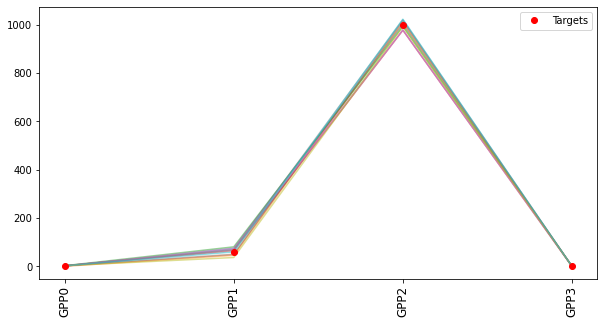

In [154]:
#GPP
sa_folder = 'sa_cmax_MD3_050_AK/'
[df_param_MD3,df_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                 path_MD3+sa_folder+results)
output_name_MD3 = ['GPP0','GPP1','GPP2','GPP3']
df_model_MD3.columns = output_name_MD3
xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)
    
yy=plot_analysis(df_param_MD3,df_model_MD3)
yy[['cmax','cmax.1','cmax.2','cmax.3']].describe().loc[['mean','std','min','max']]

Targets
[0.91, 30.87, 498.69, 0.41]


,nmax,nmax.1,nmax.2,nmax.3
mean,3.209242,2.690632,5.865335,0.861736
std,1.105548,0.878343,0.115726,0.473049
min,1.268987,0.937387,5.634649,0.419258
max,4.871305,3.545086,5.998232,1.901629


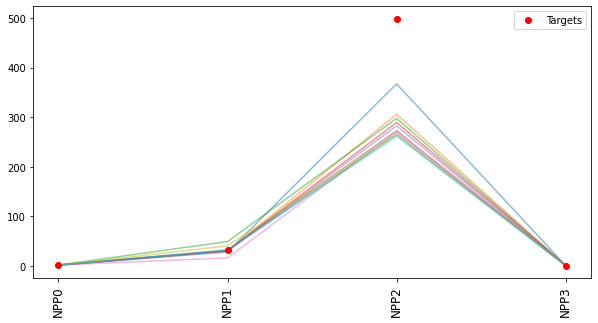

In [170]:
# NPP
sa_folder = 'sa_nmaxkrb_MD3_090_AK/'
[df_param_MD3,df_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                 path_MD3+sa_folder+results)
output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model_MD3.columns = output_name_MD3
xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)

yy=plot_analysis(df_param_MD3,df_model_MD3[['NPP0','NPP1','NPP2','NPP3']])
yy[['nmax','nmax.1','nmax.2','nmax.3']].describe().loc[['mean','std','min','max']]

Targets
[2.47, 11.82, 0.99, 8.33, 93.25, 13.28, 131.74, 5469.13, 731.99, 5.6]


,krb(0),krb(0).1,krb(0).2,krb(0).3,krb(1),krb(1).1,krb(1).2,krb(2),krb(2).1,krb(2).2
mean,-5.714511,-3.259222,-3.452772,-6.080650,-3.899732,-4.298366,-6.789944,-6.656491,-5.169691,-2.427799
std,3.801764,1.758390,1.820158,1.947512,3.324151,2.217714,1.372280,4.301705,3.451521,1.118875
min,-11.572599,-5.476884,-5.625355,-8.494030,-9.175540,-7.909541,-8.691278,-14.525480,-10.659905,-4.057231
max,-1.139832,-0.557230,-0.458945,-2.528467,-0.559787,-0.534706,-4.288235,-2.765908,-0.784903,-0.903909


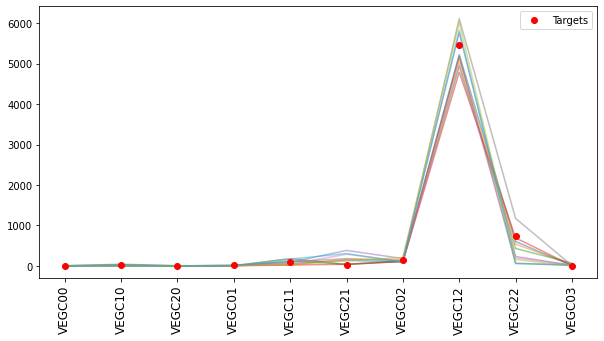

In [171]:
# VEGC & VEGN
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results_new,header=None)

output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',
                'VEGC00','VEGC10','VEGC20',
                'VEGC01','VEGC11','VEGC21',
                'VEGC02','VEGC12','VEGC22','VEGC03',
                'VEGN00','VEGN10','VEGN20',
                'VEGN01','VEGN11','VEGN21',
                'VEGN02','VEGN12','VEGN22','VEGN03']
df_model_MD3.columns = output_name_MD3
xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)

yy=plot_analysis(df_param_MD3,df_model_MD3[['VEGC00','VEGC10','VEGC20',
                'VEGC01','VEGC11','VEGC21',
                'VEGC02','VEGC12','VEGC22','VEGC03']])
yy[['krb(0)', 'krb(0).1', 'krb(0).2',
       'krb(0).3', 'krb(1)', 'krb(1).1', 'krb(1).2', 'krb(2)', 'krb(2).1',
       'krb(2).2',]].describe().loc[['mean','std','min','max']]

In [176]:
ls EML/sa-nmax-EML-bound-EJ/

info.txt           param_props.csv    results.csv        sample_matrix.csv


Targets
[0.05, 0.16, 0.01, 0.41, 2.37, 0.11, 7.04, 107.98, 1.08, 0.1]


,krb(0),krb(0).1,krb(0).2,krb(0).3,krb(1),krb(1).1,krb(1).2,krb(2),krb(2).1,krb(2).2
mean,-3.373034,-3.895021,-3.515040,-5.883440,-4.172457,-4.944865,-6.001243,-6.896321,-6.171367,-4.270358
std,2.467451,1.527350,2.126596,2.350852,3.478706,1.144432,2.261776,4.097851,3.223512,2.558022
min,-7.782214,-6.372901,-5.983001,-8.578537,-9.616845,-6.515074,-9.417412,-13.298387,-11.864822,-8.069662
max,-1.139832,-1.907836,-0.346923,-1.776864,-0.559787,-2.386775,-2.741907,-1.776953,-0.784903,-1.251988


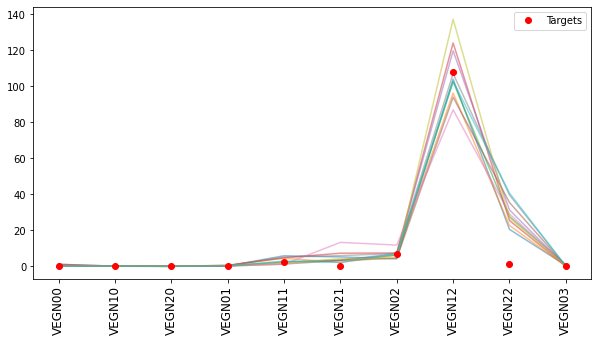

In [173]:
yy=plot_analysis(df_param_MD3,df_model_MD3[['VEGN00','VEGN10','VEGN20',
                'VEGN01','VEGN11','VEGN21',
                'VEGN02','VEGN12','VEGN22','VEGN03']])
yy[['krb(0)', 'krb(0).1', 'krb(0).2',
       'krb(0).3', 'krb(1)', 'krb(1).1', 'krb(1).2', 'krb(2)', 'krb(2).1',
       'krb(2).2',]].describe().loc[['mean','std','min','max']]

In [159]:
df_param_MD3.columns

Index(['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'krb(0)', 'krb(0).1', 'krb(0).2',
       'krb(0).3', 'krb(1)', 'krb(1).1', 'krb(1).2', 'krb(2)', 'krb(2).1',
       'krb(2).2', 'cfall(0)', 'cfall(0).1', 'cfall(0).2', 'cfall(0).3',
       'cfall(1)', 'cfall(1).1', 'cfall(1).2', 'cfall(2)', 'cfall(2).1',
       'cfall(2).2', 'nfall(0)', 'nfall(0).1', 'nfall(0).2', 'nfall(1)',
       'nfall(1).1', 'nfall(1).2', 'nfall(2)', 'nfall(2).1', 'nfall(2).2'],
      dtype='object')

In [162]:
yy[['nfall(0)', 'nfall(0).1', 'nfall(0).2', 'nfall(1)',
       'nfall(1).1', 'nfall(1).2', 'nfall(2)', 'nfall(2).1', 
    'nfall(2).2']].describe().loc[['mean','std','min','max']]

,nfall(0),nfall(0).1,nfall(0).2,nfall(1),nfall(1).1,nfall(1).2,nfall(2),nfall(2).1,nfall(2).2
mean,0.010494,0.027313,0.008813,0.000970,0.000861,0.009470,0.013341,0.007051,0.007265
std,0.005547,0.013559,0.004438,0.000614,0.000600,0.004228,0.005918,0.003304,0.004330
min,0.001169,0.004193,0.001528,0.000172,0.000171,0.002809,0.002681,0.001896,0.001119
max,0.019169,0.042138,0.014417,0.001813,0.001801,0.015027,0.020126,0.011320,0.015004


In [163]:
yy[['cfall(0)', 'cfall(0).1', 'cfall(0).2', 'cfall(0).3',
       'cfall(1)', 'cfall(1).1', 'cfall(1).2', 'cfall(2)', 'cfall(2).1',
       'cfall(2).2']].describe().loc[['mean','std','min','max']]

,cfall(0),cfall(0).1,cfall(0).2,cfall(0).3,cfall(1),cfall(1).1,cfall(1).2,cfall(2),cfall(2).1,cfall(2).2
mean,0.001909,0.058554,0.081741,0.004163,0.004482,0.006897,0.001649,0.006868,0.009524,0.001440
std,0.000983,0.033098,0.033132,0.003509,0.002772,0.004274,0.000620,0.004233,0.003987,0.000671
min,0.000286,0.012039,0.018300,0.000646,0.000779,0.001440,0.000689,0.001646,0.003202,0.000267
max,0.003271,0.102567,0.118891,0.010278,0.009795,0.012732,0.002407,0.013184,0.015283,0.002276


Targets
[534.19, 2017.94, 11004.89, 3.5]


,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
mean,0.217210,0.904641,0.561357,0.004050,0.000015,0.985059,256707.676537,0.436556,0.859598,0.022791,0.315016
std,0.075009,0.235389,0.243173,0.000856,0.000006,0.001565,22633.717692,0.211052,0.083119,0.002140,0.150785
min,0.098319,0.545428,0.147913,0.002914,0.000010,0.982636,212548.630250,0.121849,0.770896,0.018736,0.090139
max,0.338815,1.151679,0.951588,0.005096,0.000028,0.987830,285433.032439,0.666515,0.985473,0.025724,0.479537


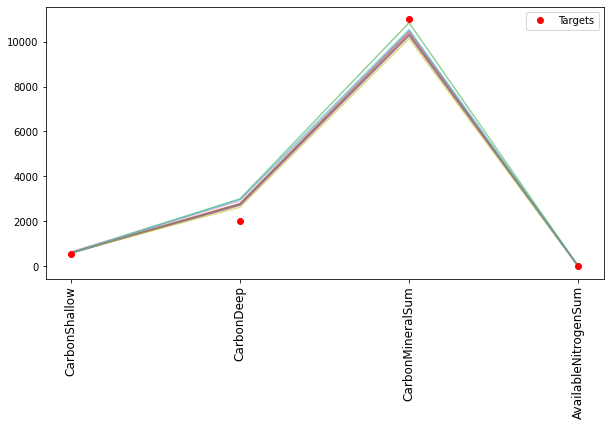

In [168]:
#Load MD3
sa_folder = 'sa_soil_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
df_model_MD3.columns = output_name

xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)

yy=plot_analysis(df_param_MD3,df_model_MD3)
yy.describe().loc[['mean','std','min','max']]

In [11]:
#Load Functions
def read_samples_resutls(paths,pathr):
    df_param = pd.read_csv(paths)
    df_model = pd.read_csv(pathr,header=None)
    return [df_param,df_model]



def z_score(y_short,y_long):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    '''
    zscore=[]
    for iname in y_long.columns:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
    df_z = pd.DataFrame(zscore)
    df_z.index = y_long.columns
    
    return df_z

def get_by_index(zscore,index_list):
    return pd.Series([zscore[0][iname] for iname in index_list])

def nmae_score(ymodel,df_model):
    # MAE is computed by taking the absolute difference between each target value and its corresponding 
    # model output value (over all runs), and then taking the average of these absolute differences. n=num simulations
    # MAE = (1 / n) * Σ|target_i - model_i|
    # Calculate the mean of the absolute values of the target values.
    # Mean Absolute Target Value = (1 / n) * Σ|target_i|
    # NMAE = (MAE / Mean Absolute Target Value) * 100

    '''    
    df_model: model dataframe
    ymodel: full dataframe constrained by error
    '''
    targets = df_model.iloc[-1, :]
    [n,m]=np.shape(ymodel)
    df=(abs(ymodel.iloc[:-1,:] - df_model.iloc[-1, :]))
    column_sums = df.sum(axis=0)
    mae = column_sums /(n-1) 
    mean_abs_target = np.abs(targets).mean()
    nmae = (mae / mean_abs_target) * 100
    df_nmae = pd.DataFrame(nmae)
    nmae = get_by_index(df_nmae,list(df_model.columns))
    df_nmae_score = pd.DataFrame(nmae)
    df_nmae_score.index = df_model.columns
    
    return  df_nmae_score

def site_metric_matrix(metric_matrix, metric):
    '''    
    metric_matrix: matrix (dataframe) of metric to plot. cols = sites, rows = targets
    metric: string of the name of the metric, ex; 'NMAE'
    '''
 
    n_rows, n_cols = metric_matrix.shape
    sns.set(font_scale=1.2)
    fig, ax = plt.subplots(figsize=(6, 10))
    sns.heatmap(metric_matrix, cmap="coolwarm", vmin = -2, vmax = 2,annot=True, fmt=".2f",
               cbar_kws={'label': 'relative score',"orientation": 'horizontal'},
               annot_kws={"fontsize":11})
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Plant Functional Types',FontSize=14)
    ax.set_ylabel('Targets',FontSize=14)
    ax.set_title(metric + ' Matrix',FontSize=14)
    plt.show()
    return

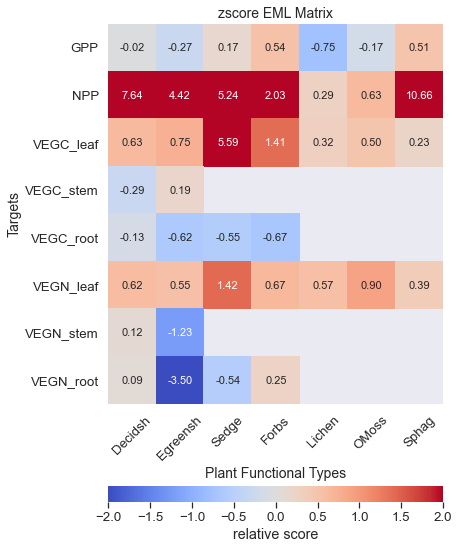

In [14]:
# Load EML21
rmetric='r2rmse'
nelem=10
order=True

def plot_EML(rmetric='r2rmse', nelem=10, order=True, metric='zscore', site=''):
    # metric: zscore, nmae_score
    #GPP
    sa_folder='sa_cmax_EML21_090_AK/'
    [df_param_EML,df_model_EML0]=read_samples_resutls(path_EML+sa_folder+samples,
                                                     path_EML+sa_folder+results)
    output_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','NA','NA']
    df_model_EML0.columns = output_name
    df_model_EML=df_model_EML0.iloc[:,:-2].copy()
    xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)
    
    if metric == 'zscore':
        gpp_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
    else:
        gpp_eml = nmae_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
        
    gpp_eml=get_by_index(gpp_eml,['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6'])
        

    # NPP
    sa_folder='sa_nmaxkrb_EML21_090_AK-2/'
    [df_param_EML,df_model_EML]=read_samples_resutls(path_EML+sa_folder+samples,
                                                     path_EML+sa_folder+results)
    output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
                   'VEGC00','VEGC10','VEGC20',
                   'VEGC01','VEGC11','VEGC21', 
                   'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06']
    df_model_EML.columns = output_name
    xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)

    if metric == 'zscore':
        npp_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
    else:
        npp_eml = nmae_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
    
    npp_eml=get_by_index(npp_eml,['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6'])

    #VEGC
    sa_folder = 'sa_nmaxkrbcfallnfall_EML21_090_AK-2/'
    df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
    df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

    output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
                   'VEGC00','VEGC10','VEGC20',
                   'VEGC01','VEGC11','VEGC21', 
                   'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06',
                   'VEGN00','VEGN10','VEGN20',
                   'VEGN01','VEGN11','VEGN21', 
                   'VEGN02','VEGN22','VEGN03','VEGN23','VEGN04','VEGN05','VEGN06']
    df_model_EML.columns = output_name

    xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)
    
    if metric == 'zscore':
        vegc_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
    else:
        vegc_eml = nmae_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
    
    #z_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],df_model_EML)
    vegc_eml_leaf=get_by_index(vegc_eml,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06'])
    vegc_eml_stem=get_by_index(vegc_eml,['VEGC10','VEGC11'])
    vegc_eml_root=get_by_index(vegc_eml,['VEGC20','VEGC21','VEGC22','VEGC23',])

    #VEGN
    vegn_eml_leaf=get_by_index(vegc_eml,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06'])
    vegn_eml_stem=get_by_index(vegc_eml,['VEGN10','VEGN11'])
    vegn_eml_root=get_by_index(vegc_eml,['VEGN20','VEGN21','VEGN22','VEGN23',])

    #new
    z_eml_matrix = pd.DataFrame({
             'GPP': gpp_eml,
             'NPP': npp_eml,
             'VEGC_leaf': vegc_eml_leaf, 'VEGC_stem': vegc_eml_stem, 'VEGC_root': vegc_eml_root,
             'VEGN_leaf': vegn_eml_leaf, 'VEGN_stem': vegn_eml_stem, 'VEGN_root': vegn_eml_root
            })
    z_eml_matrix.index=['Decidsh', 'Egreensh', 'Sedge', 'Forbs', 'Lichen', 'OMoss', 'Sphag']
    
    site_metric_matrix(z_eml_matrix.T, metric+' '+site)
    
plot_EML(rmetric, nelem, order, metric='zscore', site='EML')

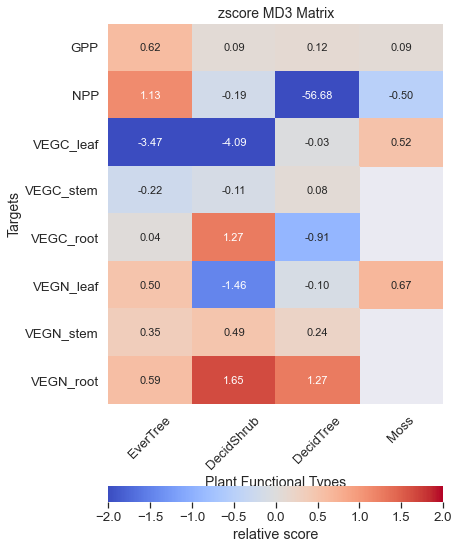

In [16]:
# Load MD3
def plot_MD3(rmetric='r2rmse', nelem=10, order=True, metric='zscore', site=''):
    # metric: zscore, nmae_score
    #GPP
    sa_folder = 'sa_cmax_MD3_050_AK/'
    [df_param_MD3,df_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                     path_MD3+sa_folder+results)
    output_name_MD3 = ['GPP0','GPP1','GPP2','GPP3']
    df_model_MD3.columns = output_name_MD3
    xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)

    #z_gpp_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
    #                    df_model_MD3)

    if metric == 'zscore':
        gpp_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)
    else:
        gpp_md3 = nmae_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)
        
    gpp_md3=get_by_index(gpp_md3,['GPP0','GPP1','GPP2','GPP3'])

    # NPP
    sa_folder = 'sa_nmaxkrb_MD3_090_AK/'
    [df_param_MD3,df_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                     path_MD3+sa_folder+results)
    output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',\
                       'VEGC00','VEGC10','VEGC20',\
                       'VEGC01','VEGC11','VEGC21',\
                       'VEGC02','VEGC12','VEGC22',\
                       'VEGC03'
                       ]
    df_model_MD3.columns = output_name_MD3
    xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)
    #z_npp_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],df_model_MD3)
    if metric == 'zscore':
        npp_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)
    else:
        npp_md3 = nmae_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)
    
    npp_md3=get_by_index(npp_md3,['NPP0','NPP1','NPP2','NPP3'])

    #VEGC
    sa_folder = 'sa_nmaxkrbcfallnfall_MD3_090_AK/'
    df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
    df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results_new,header=None)

    output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',
                    'VEGC00','VEGC10','VEGC20',
                    'VEGC01','VEGC11','VEGC21',
                    'VEGC02','VEGC12','VEGC22','VEGC03',
                    'VEGN00','VEGN10','VEGN20',
                    'VEGN01','VEGN11','VEGN21',
                    'VEGN02','VEGN12','VEGN22','VEGN03']
    df_model_MD3.columns = output_name_MD3
    xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)
    
    if metric == 'zscore':
        vegc_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)
    else:
        vegc_md3 = nmae_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)

#    z_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],df_model_MD3)
    
    vegc_md3_leaf=get_by_index(vegc_md3,['VEGC00','VEGC01','VEGC02','VEGC03'])
    vegc_md3_stem=get_by_index(vegc_md3,['VEGC10','VEGC11','VEGC12'])
    vegc_md3_root=get_by_index(vegc_md3,['VEGC20','VEGC21','VEGC22'])

    #VEGN
    vegn_md3_leaf=get_by_index(vegc_md3,['VEGN00','VEGN01','VEGN02','VEGN03'])
    vegn_md3_stem=get_by_index(vegc_md3,['VEGN10','VEGN11','VEGN12'])
    vegn_md3_root=get_by_index(vegc_md3,['VEGN20','VEGN21','VEGN22'])

    #new
    z_md3_matrix = pd.DataFrame({
             'GPP': gpp_md3,
             'NPP': npp_md3,
             'VEGC_leaf': vegc_md3_leaf, 'VEGC_stem': vegc_md3_stem, 'VEGC_root': vegc_md3_root,
             'VEGN_leaf': vegn_md3_leaf, 'VEGN_stem': vegn_md3_stem, 'VEGN_root': vegn_md3_root
            })
    z_md3_matrix.index=['EverTree', 'DecidShrub', 'DecidTree', 'Moss']

    site_metric_matrix(z_md3_matrix.T, metric+' '+site)
    
plot_MD3(rmetric, nelem, order, metric='zscore', site='MD3')


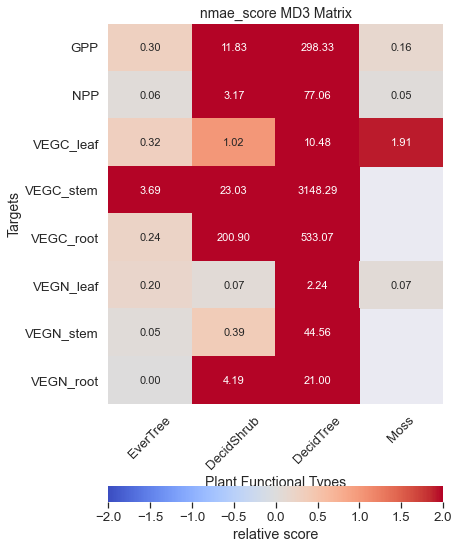

In [17]:
plot_MD3(rmetric='r2rmsemape', nelem=10, order=False, metric='nmae_score',site='MD3')

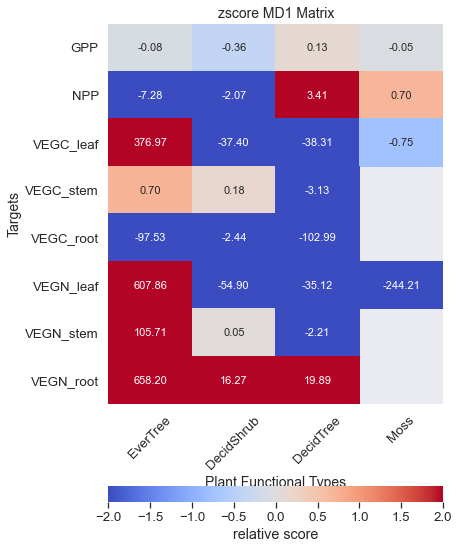

In [18]:
# Load MD1
def plot_MD1(rmetric='r2rmse', nelem=10, order=True, metric='zscore', site=''):
    # metric: zscore, nmae_score
    #GPP
    sa_folder = 'SA-MD1-STEP1/'

    [df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                     path_MD1+sa_folder+results)
    output_name_MD1 = ['GPP0','GPP1','GPP2','GPP3']
    df_model_MD1.columns = output_name_MD1
    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)

    if metric == 'zscore':
        gpp_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
    else:
        gpp_md1 = nmae_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
        
    gpp_md1=get_by_index(gpp_md1,['GPP0','GPP1','GPP2','GPP3'])

    # NPP
    sa_folder = 'SA-MD1-STEP2/'
    [df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                     path_MD1+sa_folder+'results.csv')
    output_name_MD1 = ['NPP0','NPP1','NPP2','NPP3',\
                       'VEGC00','VEGC10','VEGC20',\
                       'VEGC01','VEGC11','VEGC21',\
                       'VEGC02','VEGC12','VEGC22',\
                       'VEGC03'
                       ]
    df_model_MD1.columns = output_name_MD1
    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)

    if metric == 'zscore':
        npp_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
    else:
        npp_md1 = nmae_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
        
    npp_md1=get_by_index(npp_md1,['NPP0','NPP1','NPP2','NPP3'])

    #VEGC
    sa_folder = 'SA-MD1-STEP2/'
    [df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                     path_MD1+sa_folder+'results.csv')
    model_name = ['NPP0','NPP1','NPP2','NPP3',
                  'VEGC00','VEGC10','VEGC20',
                  'VEGC01','VEGC11','VEGC21',
                  'VEGC02','VEGC12','VEGC22','VEGC03']
    df_model_MD1.columns = model_name
    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)
    
    if metric == 'zscore':
        vegc_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
    else:
        vegc_md1 = nmae_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)

    vegc_md1_leaf=get_by_index(vegc_md1,['VEGC00','VEGC01','VEGC02','VEGC03'])
    vegc_md1_stem=get_by_index(vegc_md1,['VEGC10','VEGC11','VEGC12'])
    vegc_md1_root=get_by_index(vegc_md1,['VEGC20','VEGC21','VEGC22'])


    #VEGN
    sa_folder = 'SA-STEP3-MD1-NPPVEGCVEGN-nfall-075/'
    [df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                     path_MD1+sa_folder+'results.csv')
    model_name = ['NPP0','NPP1','NPP2','NPP3',
                  'VEGC00','VEGC10','VEGC20',
                  'VEGC01','VEGC11','VEGC21',
                  'VEGC02','VEGC12','VEGC22','VEGC03',
                  'VEGN00','VEGN10','VEGN20',
                  'VEGN01','VEGN11','VEGN21',
                  'VEGN02','VEGN12','VEGN22','VEGN03',]
    df_model_MD1.columns = model_name
    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)
    
    if metric == 'zscore':
        vegc_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
    else:
        vegc_md1 = nmae_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)    
    
    vegn_md1_leaf=get_by_index(vegc_md1,['VEGN00','VEGN01','VEGN02','VEGN03'])
    vegn_md1_stem=get_by_index(vegc_md1,['VEGN10','VEGN11','VEGN12'])
    vegn_md1_root=get_by_index(vegc_md1,['VEGN20','VEGN21','VEGN22'])

    #new
    z_md1_matrix = pd.DataFrame({
             'GPP': gpp_md1,
             'NPP': npp_md1,
             'VEGC_leaf': vegc_md1_leaf, 'VEGC_stem': vegc_md1_stem, 'VEGC_root': vegc_md1_root,
             'VEGN_leaf': vegn_md1_leaf, 'VEGN_stem': vegn_md1_stem, 'VEGN_root': vegn_md1_root
            })
    z_md1_matrix.index=['EverTree', 'DecidShrub', 'DecidTree', 'Moss']

    site_metric_matrix(z_md1_matrix.T, metric+' '+site)
    
plot_MD1(rmetric, nelem, order, metric='zscore', site='MD1')


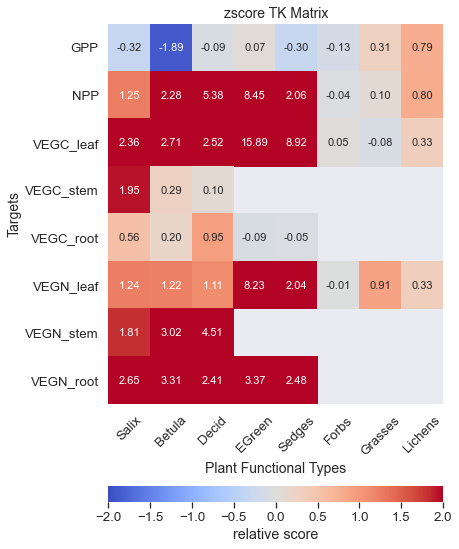

In [23]:
# Load TK1
def plot_TK(rmetric='r2rmse', nelem=10, order=True, metric='zscore', site=''):
    # metric: zscore, nmae_score
    #GPP
    sa_folder = 'sa-cmax-TK-075-EJ/'
    [df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                                   path_TK+sa_folder+'results.csv')
    output_name_TK = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7']
    df_model_TK.columns = output_name_TK
    xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)

    if metric == 'zscore':
        gpp_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_TK)
    else:
        gpp_tk = nmae_score(ymodel_TK.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_TK)
        
    gpp_tk=get_by_index(gpp_tk,['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7'])
    
    # NPP
    sa_folder = 'sa-krb-NPPVEGC-TK-EJ-075/'
    [df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                                   path_TK+sa_folder+'results.csv')
    model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
                  'VEGC00','VEGC10','VEGC20', 
                  'VEGC01','VEGC11','VEGC21',
                  'VEGC02','VEGC12','VEGC22',
                  'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07']
    df_model_TK.columns = model_name
    xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)
    
    if metric == 'zscore':
        npp_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_TK)
    else:
        npp_tk = nmae_score(ymodel_TK.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_TK)    
     
    npp_tk=get_by_index(npp_tk,['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7'])    
    
    # VEGC
    sa_folder = 'sa-krb-NPPVEGC-TK-EJ-075/'
    [df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                                   path_TK+sa_folder+'results.csv')
    model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
                  'VEGC00','VEGC10','VEGC20', 
                  'VEGC01','VEGC11','VEGC21',
                  'VEGC02','VEGC12','VEGC22',
                  'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07']
    df_model_TK.columns = model_name   
    
    xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)
    
    z_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_TK)
    vegc_tk_leaf=get_by_index(z_tk,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07'])
    vegc_tk_stem=get_by_index(z_tk,['VEGC10','VEGC11','VEGC12'])
    vegc_tk_root=get_by_index(z_tk,['VEGC20','VEGC21','VEGC22','VEGC23','VEGC24'])
    
    #VEGN
    sa_folder = 'sa-cfall-NPPVEGCN-TK-EJ-075/'
    [df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                                   path_TK+sa_folder+'results.csv')
    model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
                  'VEGC00','VEGC10','VEGC20', 
                  'VEGC01','VEGC11','VEGC21',
                  'VEGC02','VEGC12','VEGC22',
                  'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07',
                  'VEGN00','VEGN10','VEGN20', 
                  'VEGN01','VEGN11','VEGN21',
                  'VEGN02','VEGN12','VEGN22',
                  'VEGN03','VEGN23','VEGN04','VEGN24','VEGN05','VEGN06','VEGN07']
    df_model_TK.columns = model_name
    xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)
    
    z_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_TK)
    vegn_tk_leaf=get_by_index(z_tk,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06','VEGN07'])
    vegn_tk_stem=get_by_index(z_tk,['VEGN10','VEGN11','VEGN12'])
    vegn_tk_root=get_by_index(z_tk,['VEGN20','VEGN21','VEGN22','VEGN23','VEGN24'])
    
    #new
    z_tk_matrix = pd.DataFrame({
             'GPP': gpp_tk,
             'NPP': npp_tk,
             'VEGC_leaf': vegc_tk_leaf, 'VEGC_stem': vegc_tk_stem, 'VEGC_root': vegc_tk_root,
             'VEGN_leaf': vegn_tk_leaf, 'VEGN_stem': vegn_tk_stem, 'VEGN_root': vegn_tk_root
            })
    z_tk_matrix.index=['Salix', 'Betula', 'Decid', 'EGreen', 'Sedges', 'Forbs', 'Grasses', 'Lichens']

    site_metric_matrix(z_tk_matrix.T, metric+' '+site)
    
plot_TK(rmetric, nelem, order, metric='zscore', site='TK')

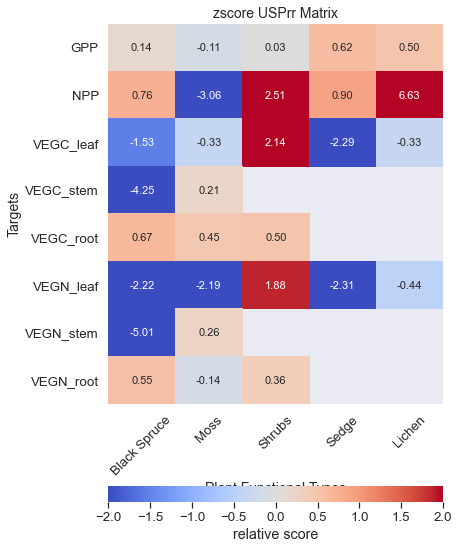

In [28]:
# Load US-Prr
def plot_USPrr(rmetric='r2rmse', nelem=10, order=True, metric='zscore', site=''):
    # metric: zscore, nmae_score
    #GPP

    sa_folder = 'STEP1-cmax-GPP/'
    [df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                         path_USPrr+sa_folder+'results.csv')
    output_name_USPrr = ['GPP0','GPP1','GPP2','GPP3','GPP4']
    df_model_USPrr.columns = output_name_USPrr
    xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
    
    if metric == 'zscore':
        gpp_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)
    else:
        gpp_USPrr = nmae_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)

    gpp_USPrr=get_by_index(gpp_USPrr,['GPP0','GPP1','GPP2','GPP3','GPP4'])

    # NPP
    sa_folder = 'STEP2-nmax_krb-NPP_vegc/'
    [df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                         path_USPrr+sa_folder+'results.csv')
    output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                         'VEGC00','VEGC10','VEGC20',\
                         'VEGC01',\
                         'VEGC02','VEGC12','VEGC22',\
                         'VEGC03','VEGC23',\
                         'VEGC04']

    df_model_USPrr.columns = output_name_USPrr
    xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
    
    if metric == 'zscore':
        npp_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)
    else:
        npp_USPrr = nmae_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)
    
    npp_USPrr=get_by_index(npp_USPrr,['NPP0','NPP1','NPP2','NPP3','NPP4'])
    
    
    # VEGC & N
    sa_folder = 'STEP3-nmax_krb_cfall_nfall-NPP_vegc_vegn/'
    [df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                         path_USPrr+sa_folder+'results.csv')
    output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                         'VEGC00','VEGC10','VEGC20',\
                         'VEGC01',\
                         'VEGC02','VEGC12','VEGC22',\
                         'VEGC03','VEGC23',\
                         'VEGC04',
                         'VEGN00','VEGN10','VEGN20',\
                         'VEGN01',\
                         'VEGN02','VEGN12','VEGN22',\
                         'VEGN03','VEGN23',\
                         'VEGN04']

    df_model_USPrr.columns = output_name_USPrr
    xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
    
    if metric == 'zscore':
        z_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)
    else:
        z_USPrr = nmae_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)
    
    vegc_USPrr_leaf=get_by_index(z_USPrr,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04'])
    vegc_USPrr_stem=get_by_index(z_USPrr,['VEGC10','VEGC12',])
    vegc_USPrr_root=get_by_index(z_USPrr,['VEGC20','VEGC22','VEGC23',])

    vegn_USPrr_leaf=get_by_index(z_USPrr,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04'])
    vegn_USPrr_stem=get_by_index(z_USPrr,['VEGN10','VEGN12',])
    vegn_USPrr_root=get_by_index(z_USPrr,['VEGN20','VEGN22','VEGN23',])
    
    #new
    z_USPrr_matrix = pd.DataFrame({
             'GPP': gpp_USPrr,
             'NPP': npp_USPrr,
             'VEGC_leaf': vegc_USPrr_leaf, 'VEGC_stem': vegc_USPrr_stem, 'VEGC_root': vegc_USPrr_root,
             'VEGN_leaf': vegn_USPrr_leaf, 'VEGN_stem': vegn_USPrr_stem, 'VEGN_root': vegn_USPrr_root
            })
    z_USPrr_matrix.index=['Black Spruce', 'Moss', 'Shrubs', 'Sedge', 'Lichen']

    site_metric_matrix(z_USPrr_matrix.T,  metric+' '+site)

plot_USPrr(rmetric, nelem, order, metric='zscore', site='USPrr')

# soil parameters -> below-ground targets (new)

In [33]:
#Load EML21
per_number=0.5
sa_folder = 'sa_soil_EML21_090_AK-2/'
df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
df_model_EML.columns = output_name

xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)

#Load MD3
sa_folder = 'sa_soil_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

df_model_MD3.columns = output_name

xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)

#Load TK3
sa_folder = 'soilC-tk-EJ-095_case2/'
df_param_TK = pd.read_csv(path_TK+sa_folder+samples)
df_model_TK = pd.read_csv(path_TK+sa_folder+'results.csv',header=None)

df_model_TK.columns = output_name

xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)

#Load MD1
sa_folder = 'sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/'

[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')

output_name = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20',
              'VEGN01','VEGN11','VEGN21',
              'VEGN02','VEGN12','VEGN22','VEGN03',
              'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']

df_model_MD1.columns = output_name
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)

# Load US-Prr
sa_folder = 'STEP4-soilC/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','OrganicNitrogenSum','AvailableNitrogenSum']
df_model_USPrr.columns = output_name

print(df_model_USPrr.isnull().values.any(),'have nans')
df_model_USPrr=df_model_USPrr.fillna(0)
xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
xparams_USPrr

z_soil_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_TK)
soil_tk=get_by_index(z_soil_tk,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_EML)
soil_eml=get_by_index(z_soil_eml,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD3)
soil_md3=get_by_index(z_soil_md3,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD1)
soil_md1=get_by_index(z_soil_md1,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_USPrr)
soil_USPrr=get_by_index(z_soil_USPrr,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])

True have nans


# soil parameters -> below-ground targets

In [29]:
#Load EML21
per_number=0.5
sa_folder = 'sa_soil_EML21_090_AK-2/'
df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
df_model_EML.columns = output_name

xparams_EML, ymodel_EML =  ut.get_params_r2_rmse(df_param_EML,df_model_EML,r2lim=per_number)

#Load MD3
sa_folder = 'sa_soil_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

df_model_MD3.columns = output_name

xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=per_number)

#Load TK3
sa_folder = 'soilC-tk-EJ-095_case2/'
df_param_TK = pd.read_csv(path_TK+sa_folder+samples)
df_model_TK = pd.read_csv(path_TK+sa_folder+'results.csv',header=None)

df_model_TK.columns = output_name

xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=.45)

#Load MD1
sa_folder = 'sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/'

[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')

output_name = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20',
              'VEGN01','VEGN11','VEGN21',
              'VEGN02','VEGN12','VEGN22','VEGN03',
              'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']

df_model_MD1.columns = output_name
xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param_MD1,df_model_MD1,r2lim=.98)

# Load US-Prr
sa_folder = 'STEP4-soilC/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','OrganicNitrogenSum','AvailableNitrogenSum']
df_model_USPrr.columns = output_name

print(df_model_USPrr.isnull().values.any(),'have nans')
df_model_USPrr=df_model_USPrr.fillna(0)
xparams_USPrr, ymodel_USPrr =  ut.get_params_r2_rmse(df_param_USPrr,df_model_USPrr,r2lim=0.94)
xparams_USPrr

z_soil_tk = z_score(ymodel_TK,df_model_TK)
soil_tk=get_by_index(z_soil_tk,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_eml = z_score(ymodel_EML,df_model_EML)
soil_eml=get_by_index(z_soil_eml,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md3 = z_score(ymodel_MD3,df_model_MD3)
soil_md3=get_by_index(z_soil_md3,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md1 = z_score(ymodel_MD1,df_model_MD1)
soil_md1=get_by_index(z_soil_md1,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_USPrr = z_score(ymodel_USPrr,df_model_USPrr)
soil_USPrr=get_by_index(z_soil_USPrr,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])

True have nans


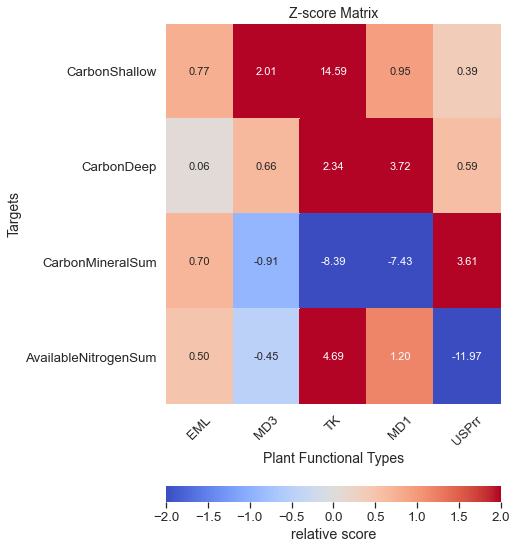

In [30]:
#new
z_matrix_soil = pd.DataFrame({'EML': soil_eml,'MD3': soil_md3,'TK': soil_tk, 'MD1': soil_md1,
                             'USPrr': soil_USPrr})
z_matrix_soil.index=['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
site_metric_matrix(z_matrix_soil, 'Z-score')

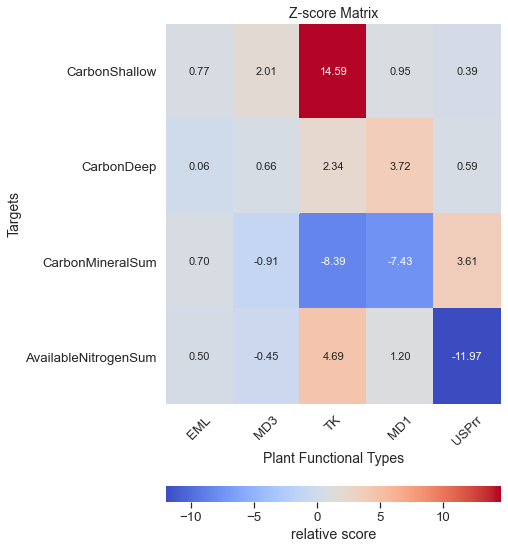

In [30]:
z_matrix_soil = pd.DataFrame({'EML': soil_eml,'MD3': soil_md3,'TK': soil_tk, 'MD1': soil_md1,
                             'USPrr': soil_USPrr})
z_matrix_soil.index=['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
site_metric_matrix(z_matrix_soil, 'Z-score')

In [7]:
xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
xparams_USPrr.sort_values(by=['r2rmse'],ascending=True)[:10]
ymodel_USPrr.sort_values(by=['r2rmse'],ascending=True)[:10]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
144,3834.061786,22278.280386,49911.418377,2823.786567,0.149425,0.987376,4.460832e+06,8.089445,0.987376,0.013144,0.013144
162,3484.513708,24851.822110,50253.092351,2896.680871,0.108647,0.982484,6.430261e+06,11.228515,0.981673,0.018293,0.018293
5,3707.599231,24212.258169,50656.203214,2859.068558,0.349605,0.981986,6.657491e+06,3.399960,0.981082,0.018823,0.018823
63,3945.184791,25481.559361,50224.174105,2944.292219,0.066926,0.981016,6.954125e+06,18.268562,0.979990,0.019822,0.019822
400,3783.946380,25842.839793,49989.822731,2910.114642,0.113256,0.980854,6.997705e+06,10.754573,0.979810,0.019987,0.019987
119,3143.662085,24637.283890,51586.186471,2898.112690,0.062015,0.975656,9.410754e+06,19.777004,0.973619,0.025538,0.025538
410,7175.633894,21804.660507,51744.567333,2767.902305,0.011037,0.972039,1.016607e+07,111.427513,0.969691,0.029178,0.029178
495,4603.189456,29251.019130,50283.544366,3186.458782,1.756551,0.961446,1.457529e+07,0.605648,0.957283,0.040364,0.040364
41,3839.400087,17214.643753,52124.120461,2846.375719,0.077594,0.960221,1.495819e+07,15.782374,0.955901,0.041627,0.041627
3,8549.167647,20590.222964,52497.666460,2782.976646,0.037583,0.959818,1.475031e+07,32.693213,0.955584,0.041963,0.041963


In [98]:
ymodel_USPrr.sort_values(by=['R2'],ascending=False)[:10]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
144,3834.061786,22278.280386,49911.418377,2823.786567,0.149425,0.987376,4.460832e+06,8.089445,0.987376,0.013144,0.013144
162,3484.513708,24851.822110,50253.092351,2896.680871,0.108647,0.982484,6.430261e+06,11.228515,0.981673,0.018293,0.018293
5,3707.599231,24212.258169,50656.203214,2859.068558,0.349605,0.981986,6.657491e+06,3.399960,0.981082,0.018823,0.018823
63,3945.184791,25481.559361,50224.174105,2944.292219,0.066926,0.981016,6.954125e+06,18.268562,0.979990,0.019822,0.019822
400,3783.946380,25842.839793,49989.822731,2910.114642,0.113256,0.980854,6.997705e+06,10.754573,0.979810,0.019987,0.019987
119,3143.662085,24637.283890,51586.186471,2898.112690,0.062015,0.975656,9.410754e+06,19.777004,0.973619,0.025538,0.025538
410,7175.633894,21804.660507,51744.567333,2767.902305,0.011037,0.972039,1.016607e+07,111.427513,0.969691,0.029178,0.029178
495,4603.189456,29251.019130,50283.544366,3186.458782,1.756551,0.961446,1.457529e+07,0.605648,0.957283,0.040364,0.040364
41,3839.400087,17214.643753,52124.120461,2846.375719,0.077594,0.960221,1.495819e+07,15.782374,0.955901,0.041627,0.041627
3,8549.167647,20590.222964,52497.666460,2782.976646,0.037583,0.959818,1.475031e+07,32.693213,0.955584,0.041963,0.041963


In [83]:
xparams_USPrr.sort_values(by=['r2rmsemape'],ascending=True)[:10]

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
144,1.034717,0.159833,0.071426,0.005763,0.000017,0.987376,4.460832e+06,8.089445,0.987376,0.013144,0.013144
162,1.448248,0.650197,0.568469,0.003083,0.000022,0.982484,6.430261e+06,11.228515,0.981673,0.018293,0.018293
5,0.564732,0.208677,0.766171,0.003207,0.000100,0.981986,6.657491e+06,3.399960,0.981082,0.018823,0.018823
63,1.545538,0.493957,0.014622,0.003251,0.000036,0.981016,6.954125e+06,18.268562,0.979990,0.019822,0.019822
400,1.202606,0.508619,0.234107,0.002610,0.000050,0.980854,6.997705e+06,10.754573,0.979810,0.019987,0.019987
119,1.348196,0.967239,0.086005,0.003072,0.000043,0.975656,9.410754e+06,19.777004,0.973619,0.025538,0.025538
410,1.866178,0.020034,0.127258,0.221657,0.000046,0.972039,1.016607e+07,111.427513,0.969691,0.029178,0.029178
495,0.898986,0.122303,0.168754,0.001235,0.000004,0.961446,1.457529e+07,0.605648,0.957283,0.040364,0.040364
41,1.616240,0.119093,0.216138,0.005371,0.000029,0.960221,1.495819e+07,15.782374,0.955901,0.041627,0.041627
3,1.853501,0.019023,0.384091,0.172243,0.000072,0.959818,1.475031e+07,32.693213,0.955584,0.041963,0.041963
